# Research Question 2

Is it possible to predict the success of future instalments of a movie/game?\
Does the failure of an initial movie/game indicate commercial failures of subsequent ones? Can a franchise recover from a flop?


In [1]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plot_title_size = 30
subplot_title_size = 25
axis_label_size = 22
tick_label_size = 15

In [3]:
pd.set_option("display.max_columns", None)

In [22]:
df = pd.read_csv("final_dataframes\\df_merged_years.csv", index_col = 0)

In [23]:
# create separate dataframes for movie and game content types
df_movie = df[df['type'] == 'movie']
df_game = df[df['type'] == 'game']

In [24]:
df

,franchise_name,franchise_id,type,tconst,title,year,votes_average,rating_average,number_of_releases,content_per_year,first_year,last_year,lowest_vote,highest_vote,lowest_rating,highest_rating,franchise_pos,lowest_rated_year,lowest_rated_pos,highest_rated_year,highest_rated_pos,avg_rating_pre_lowest_year,avg_rating_post_lowest_year,rolling_avg_rating,current_num_in_fran,year_diff,vote_diff,rating_diff,num_of_releases_diff,running_length_years,diff_from_prev_rar,change_rel_to_rar,year_biggest_drop,pos_biggest_drop,avg_rating_pre_drop,avg_rating_post_drop
0,Mario,3025-1,game,tt0315808,Baseball,1978,14.000000,3.000000,197.0,1,1978,2022,6.0,6633.0,1.9,9.2,0.000000,1994,36.363636,1990,27.272727,6.357143,7.007042,3.000000,1.0,NaN,NaN,NaN,NaN,45,NaN,0.000000,1994,36.363636,6.300222,7.086886
1,Mario,3025-1,game,tt0355727,Major League Baseball,1980,15.000000,4.900000,197.0,1,1978,2022,6.0,6633.0,1.9,9.2,4.545455,1994,36.363636,1990,27.272727,6.357143,7.007042,3.950000,2.0,2.0,1.000000,1.900000,0.0,45,0.950000,1.900000,1994,36.363636,6.300222,7.086886
2,Mario,3025-1,game,tt0176664,Donkey Kong,1981,2039.000000,7.400000,197.0,1,1978,2022,6.0,6633.0,1.9,9.2,6.818182,1994,36.363636,1990,27.272727,6.357143,7.007042,5.100000,3.0,1.0,2024.000000,2.500000,0.0,45,1.150000,3.450000,1994,36.363636,6.300222,7.086886
3,Mario,3025-1,game,"tt0204287, tt3472820","Donkey Kong Junior, Donkey Kong",1982,174.500000,6.450000,197.0,2,1978,2022,6.0,6633.0,1.9,9.2,9.090909,1994,36.363636,1990,27.272727,6.357143,7.007042,5.640000,5.0,1.0,-1864.500000,-0.950000,1.0,45,0.540000,1.350000,1994,36.363636,6.300222,7.086886
4,Mario,3025-1,game,"tt0176971, tt0185909, tt0302501, tt2318635, tt...","Mario Bros., Baseball, Donkey Kong, Pinball, M...",1983,328.400000,6.020000,197.0,5,1978,2022,6.0,6633.0,1.9,9.2,11.363636,1994,36.363636,1990,27.272727,6.357143,7.007042,5.830000,10.0,1.0,153.900000,-0.430000,3.0,45,0.190000,0.380000,1994,36.363636,6.300222,7.086886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10975,Renato Castellani's Italian neorealism trilogy,f994,movie,tt0038970,Sotto il sole di Roma,1948,311.000000,6.900000,4.0,1,1948,1950,99.0,658.0,6.0,7.0,0.000000,1950,100.000000,1950,100.000000,6.900000,NaN,6.900000,1.0,NaN,NaN,NaN,NaN,3,NaN,0.000000,1950,100.000000,6.900000,NaN
10976,Renato Castellani's Italian neorealism trilogy,f994,movie,"tt0040018, tt0044572, tt0042060","It's Forever Springtime, Two Cents Worth of Ho...",1950,312.333333,6.466667,4.0,3,1948,1950,99.0,658.0,6.0,7.0,100.000000,1950,100.000000,1950,100.000000,6.900000,NaN,6.575000,4.0,2.0,1.333333,-0.433333,2.0,3,-0.325000,-0.433333,1950,100.000000,6.900000,NaN
10977,It's Alive,f995,movie,"tt0071198, tt0071675","The Bat People, It's Alive",1974,5449.500000,4.250000,4.0,2,1974,1987,2068.0,8301.0,2.7,5.8,0.000000,1974,0.000000,1974,0.000000,NaN,5.000000,4.250000,2.0,NaN,NaN,NaN,NaN,14,NaN,0.000000,1974,0.000000,NaN,5.000000
10978,It's Alive,f995,movie,tt0077756,It Lives Again,1978,2494.000000,5.200000,4.0,1,1974,1987,2068.0,8301.0,2.7,5.8,30.769231,1974,0.000000,1974,0.000000,NaN,5.000000,4.566667,3.0,4.0,-2955.500000,0.950000,-1.0,14,0.316667,0.950000,1974,0.000000,NaN,5.000000


In [ ]:
The first thing we want to examine is the 

In [51]:
highest_rated = df[df['year'] == df["highest_rated_year"]]
lowest_rated = df[df['year'] == df["lowest_rated_year"]]

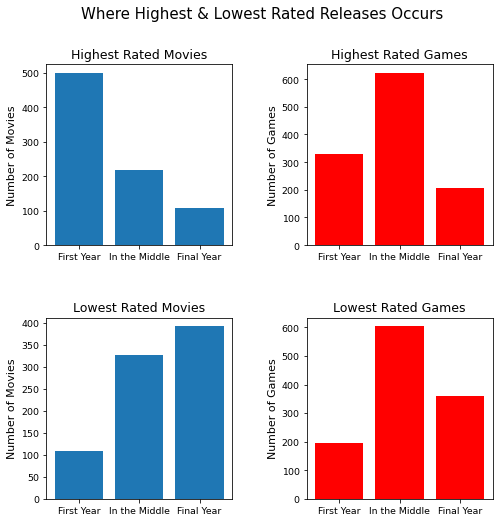

In [142]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
fig.subplots_adjust(wspace=0.4, hspace=0.4)

x_labels = ['First Year', 'In the Middle', 'Final Year']

highest_movie_values = [len(highest_rated[(highest_rated['franchise_pos'] == 0) & (highest_rated['type']=='movie')]),
            len(highest_rated[(highest_rated['franchise_pos'] > 0) & (highest_rated['franchise_pos'] < 100) & (highest_rated['type']=='movie')]),
            len(highest_rated[(highest_rated['franchise_pos'] == 100) & (highest_rated['type']=='movie')])]
                       
highest_game_values = [len(highest_rated[(highest_rated['franchise_pos'] == 0) & (highest_rated['type']=='game')]),
            len(highest_rated[(highest_rated['franchise_pos'] > 0) & (highest_rated['franchise_pos'] < 100) & (highest_rated['type']=='game')]),
            len(highest_rated[(highest_rated['franchise_pos'] == 100) & (highest_rated['type']=='game')])]

lowest_movie_values = [len(lowest_rated[(lowest_rated['franchise_pos'] == 0) & (lowest_rated['type']=='movie')]),
            len(lowest_rated[(lowest_rated['franchise_pos'] > 0) & (lowest_rated['franchise_pos'] < 100) & (lowest_rated['type']=='movie')]),
            len(lowest_rated[(lowest_rated['franchise_pos'] == 100) & (lowest_rated['type']=='movie')])]
                       
lowest_game_values = [len(lowest_rated[(lowest_rated['franchise_pos'] == 0) & (lowest_rated['type']=='game')]),
            len(lowest_rated[(lowest_rated['franchise_pos'] > 0) & (lowest_rated['franchise_pos'] < 100) & (lowest_rated['type']=='game')]),
            len(lowest_rated[(lowest_rated['franchise_pos'] == 100) & (lowest_rated['type']=='game')])]

# plot the bar chart
axs[0][0].bar(x_labels, highest_movie_values)
axs[0][1].bar(x_labels, highest_game_values, color = 'red')
axs[1][0].bar(x_labels, lowest_movie_values)
axs[1][1].bar(x_labels, lowest_game_values, color = 'red')

fig.suptitle('Where Highest & Lowest Rated Releases Occurs', fontsize = plot_title_size/2,)
axs[0][0].set_title('Highest Rated Movies', fontsize = subplot_title_size/2)
axs[0][0].set_ylabel('Number of Movies', fontsize = axis_label_size/2)
axs[0][1].set_title('Highest Rated Games', fontsize = subplot_title_size/2)
axs[0][1].set_ylabel('Number of Games', fontsize = axis_label_size/2)
axs[0][0].tick_params(labelsize=tick_label_size/1.6)
axs[0][1].tick_params(labelsize=tick_label_size/1.6)
axs[1][0].set_title('Lowest Rated Movies', fontsize = subplot_title_size/2)
axs[1][0].set_ylabel('Number of Movies', fontsize = axis_label_size/2)
axs[1][1].set_title('Lowest Rated Games', fontsize = subplot_title_size/2)
axs[1][1].set_ylabel('Number of Games', fontsize = axis_label_size/2)
axs[1][0].tick_params(labelsize=tick_label_size/1.6)
axs[1][1].tick_params(labelsize=tick_label_size/1.6)


plt.show()
fig.savefig('high_low_ratings.png', bbox_inches='tight', facecolor='w')

<AxesSubplot:>

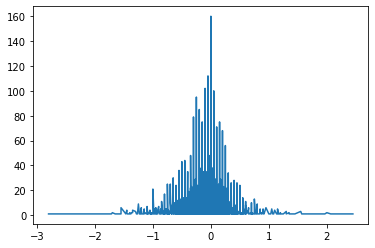

In [147]:
df.diff_from_prev_rar.value_counts().sort_index().plot()

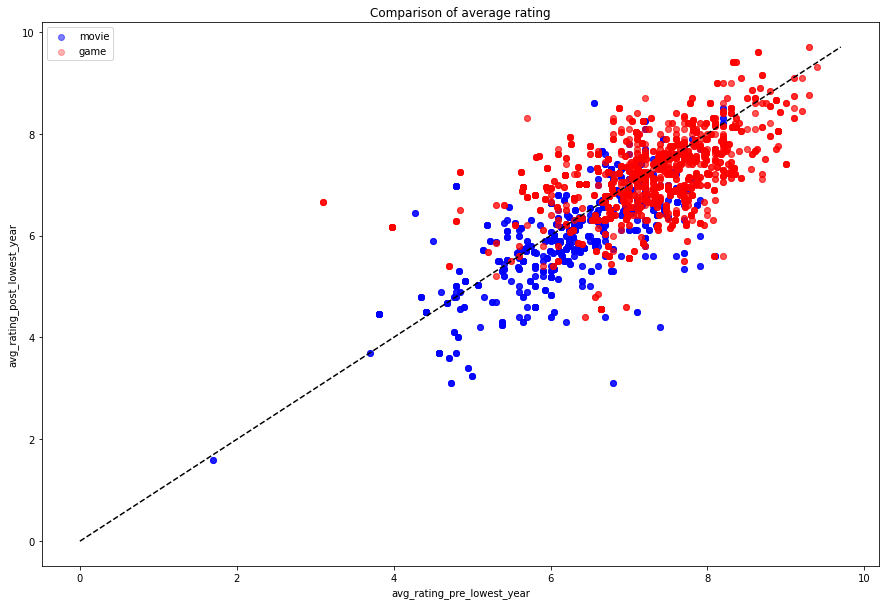

In [18]:
fig, ax = plt.subplots(figsize=(15, 10))

# plot movie data as blue scatter plot
plt.scatter(df_movie['avg_rating_pre_lowest_year'], df_movie['avg_rating_post_lowest_year'], c='blue', label='movie', alpha = 0.5)

# plot game data as red scatter plot
plt.scatter(df_game['avg_rating_pre_lowest_year'], df_game['avg_rating_post_lowest_year'], c='red', label='game', alpha = 0.3)

# draw a diagonal line from the origin
max_val = max(df['avg_rating_pre_lowest_year'].max(), df['avg_rating_post_lowest_year'].max())
plt.plot([0, max_val], [0, max_val], 'k--')

# set the x and y axis labels
plt.title('Comparison of average rating')
plt.xlabel('avg_rating_pre_lowest_year',)
plt.ylabel('avg_rating_post_lowest_year')

# set legend
plt.legend()

# show the plot
plt.show()


This checks average rating relative to rolling mean

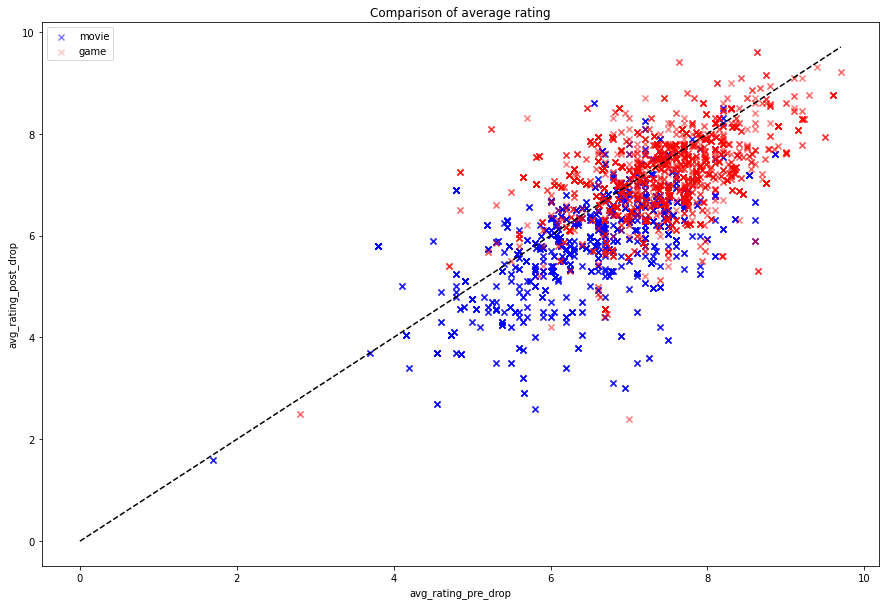

In [146]:
fig, ax = plt.subplots(figsize=(15, 10))

# create separate dataframes for movie and game content types
df_movie = df[df['type'] == 'movie']
df_game = df[df['type'] == 'game']

# plot movie data as blue scatter plot
plt.scatter(df_movie['avg_rating_pre_drop'], df_movie['avg_rating_post_drop'], marker = 'x', c='blue', label='movie', alpha = 0.5)

# plot game data as red scatter plot
plt.scatter(df_game['avg_rating_pre_drop'], df_game['avg_rating_post_drop'],marker = 'x', c='red', label='game', alpha = 0.2)

# draw a diagonal line from the origin
max_val = max(df['avg_rating_pre_drop'].max(), df['avg_rating_post_drop'].max())
plt.plot([0, max_val], [0, max_val], 'k--')

# set the x and y axis labels
plt.title('Comparison of average rating')
plt.xlabel('avg_rating_pre_drop',)
plt.ylabel('avg_rating_post_drop')

# set legend
plt.legend()

# show the plot
plt.show()


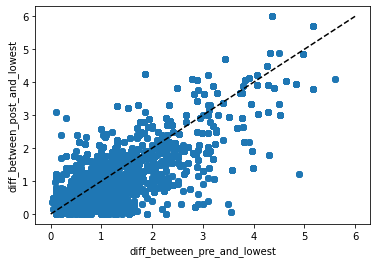

In [31]:
plt.scatter(-df['diff_between_pre_and_lowest'], df['diff_between_post_and_lowest'])

# draw a diagonal line from the origin
plt.plot([0, max(df['diff_between_pre_and_lowest'].max(), df['diff_between_post_and_lowest'].max())], [0, max(df['diff_between_pre_and_lowest'].max(), df['diff_between_post_and_lowest'].max())], 'k--')

# set the x and y axis labels
plt.xlabel('diff_between_pre_and_lowest')
plt.ylabel('diff_between_post_and_lowest')

# show the plot
plt.show()

In [33]:
df[df['rating_diff'] < 0].rating_diff.describe()

count    4.841000e+03
mean    -8.367262e-01
std      7.473222e-01
min     -6.700000e+00
25%     -1.150000e+00
50%     -6.000000e-01
75%     -3.000000e-01
max     -8.881784e-16
Name: rating_diff, dtype: float64

In [52]:
franchise_grouped_df['diff_pre_vs_post'] = franchise_grouped_df.apply(lambda x: x['avg_post_rating'] - x['avg_pre_rating'], axis = 1)
franchise_grouped_df['diff_pre_vs_post_rolling_mean'] = franchise_grouped_df.apply(lambda x: x['avg_post_rating_rolling_mean'] - x['avg_pre_rating_rolling_mean'], axis = 1)

In [51]:
franchise_grouped_df['diff_between_pre_and_lowest'] = franchise_grouped_df['diff_between_pre_and_lowest'].apply(lambda x: 0 if pd.isna(x) else abs(x))

In [76]:
franchise_grouped_df['diff_lowest_vs_avg'] = franchise_grouped_df['average_rating'] - franchise_grouped_df['lowest_rating']

In [78]:
franchise_grouped_df

,franchise_name,total_running_length_years,releases_in_franchise,content_type,avg_pre_rating,average_rating,lowest_rating,avg_post_rating,average_votes,lowest_rated_year,pos_in_fran_lowest_rated,diff_between_post_and_lowest,diff_between_pre_and_lowest,diff_from_rolling_mean,lowest_rated_year_rolling_mean,lowest_rated_pos_rolling_mean,avg_pre_rating_rolling_mean,avg_post_rating_rolling_mean,diff_pre_vs_post,diff_pre_vs_post_rolling_mean,diff_lowest_vs_avg
franchise_id,,,,,,,,,,,,,,,,,,,,,
3025-1,Mario,45.0,195.0,game,NaN,6.800734,3.000000,6.891227,750.130888,1978.0,0.000000,3.891227,NaN,-0.131610,1994.0,36.363636,6.407483,7.081909,NaN,0.674426,3.800734
3025-10,Tony Hawk,22.0,15.0,game,6.866667,6.671429,2.500000,8.500000,601.107143,2015.0,76.190476,6.000000,-4.366667,-0.335897,2015.0,76.190476,6.866667,8.500000,1.633333,1.633333,4.171429
3025-100,Commander Keen,12.0,8.0,game,NaN,7.080556,6.866667,7.187500,69.805556,1990.0,0.000000,0.320833,NaN,-0.040278,2001.0,100.000000,7.120833,NaN,NaN,NaN,0.213889
3025-1000,Fate,22.0,10.0,game,7.700000,7.590000,7.100000,7.637500,51.800000,2005.0,23.809524,0.537500,-0.600000,-0.300000,2005.0,23.809524,7.700000,7.637500,-0.062500,-0.062500,0.490000
3025-1008,Winx Club,9.0,6.0,game,7.550000,7.590000,7.100000,8.200000,11.500000,2012.0,75.000000,1.100000,-0.450000,-0.112500,2012.0,75.000000,7.550000,8.200000,0.650000,0.650000,0.490000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f99,The Conjuring Universe,9.0,8.0,movie,6.675000,6.264286,5.300000,5.925000,205675.000000,2018.0,62.500000,0.625000,-1.375000,-1.050000,2014.0,12.500000,7.500000,6.190000,-0.750000,-1.310000,0.964286
f990,Inspector Hornleigh,3.0,3.0,movie,6.750000,6.725000,6.700000,NaN,258.000000,1941.0,100.000000,NaN,-0.050000,-0.025000,1941.0,100.000000,6.750000,NaN,NaN,NaN,0.025000
f993,I soliti ignoti,28.0,3.0,movie,7.450000,6.766667,5.400000,NaN,4053.333333,1985.0,100.000000,NaN,-2.050000,-0.683333,1985.0,100.000000,7.450000,NaN,NaN,NaN,1.366667


In [79]:
# create separate dataframes for movie and game content types
franchise_grouped_df_movie = franchise_grouped_df[franchise_grouped_df['content_type'] == 'movie']
franchise_grouped_df_game = franchise_grouped_df[franchise_grouped_df['content_type'] == 'game']

In [81]:
game_percentile_90 = franchise_grouped_df_game.diff_lowest_vs_avg.quantile(0.9)
movie_percentile_90 = franchise_grouped_df_movie.diff_lowest_vs_avg.quantile(0.9) 

<AxesSubplot:>

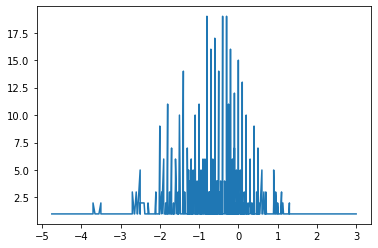

In [53]:
franchise_grouped_df.diff_pre_vs_post_rolling_mean.value_counts().sort_index().plot()

<AxesSubplot:>

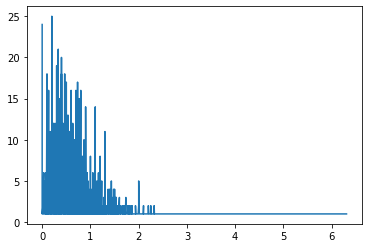

In [56]:
franchise_grouped_df.diff_lowest_vs_avg.value_counts().sort_index().plot()

<AxesSubplot:>

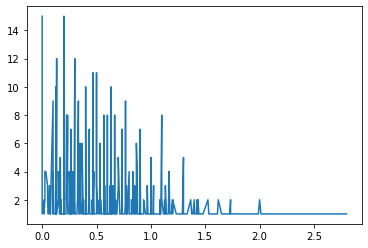

In [29]:
franchise_grouped_df_movie.diff_lowest_vs_avg.value_counts().sort_index().plot()

<AxesSubplot:>

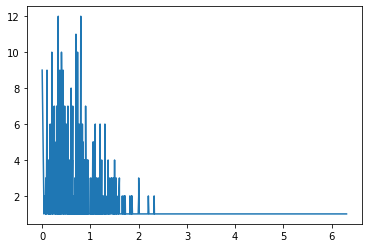

In [30]:
franchise_grouped_df_game.diff_lowest_vs_avg.value_counts().sort_index().plot()

In [103]:
franchise_grouped_df_game.diff_pre_vs_post_rolling_mean.quantile(0.9)

0.6160000000000001

In [107]:
game_percentile_10 = franchise_grouped_df_game.diff_from_rolling_mean.quantile(0.2)
movie_percentile_10 = franchise_grouped_df_movie.diff_from_rolling_mean.quantile(0.2) 

In [108]:
franchise_grouped_df_movie_flops = franchise_grouped_df_movie[franchise_grouped_df_movie['diff_from_rolling_mean'] < movie_percentile_10]
franchise_grouped_df_game_flops = franchise_grouped_df_game[franchise_grouped_df_game['diff_from_rolling_mean'] < game_percentile_10]

In [119]:
franchise_grouped_df_movie_flops = franchise_grouped_df_movie
franchise_grouped_df_game_flops = franchise_grouped_df_game

TEMP - DELETE THIS GRAPH!!!

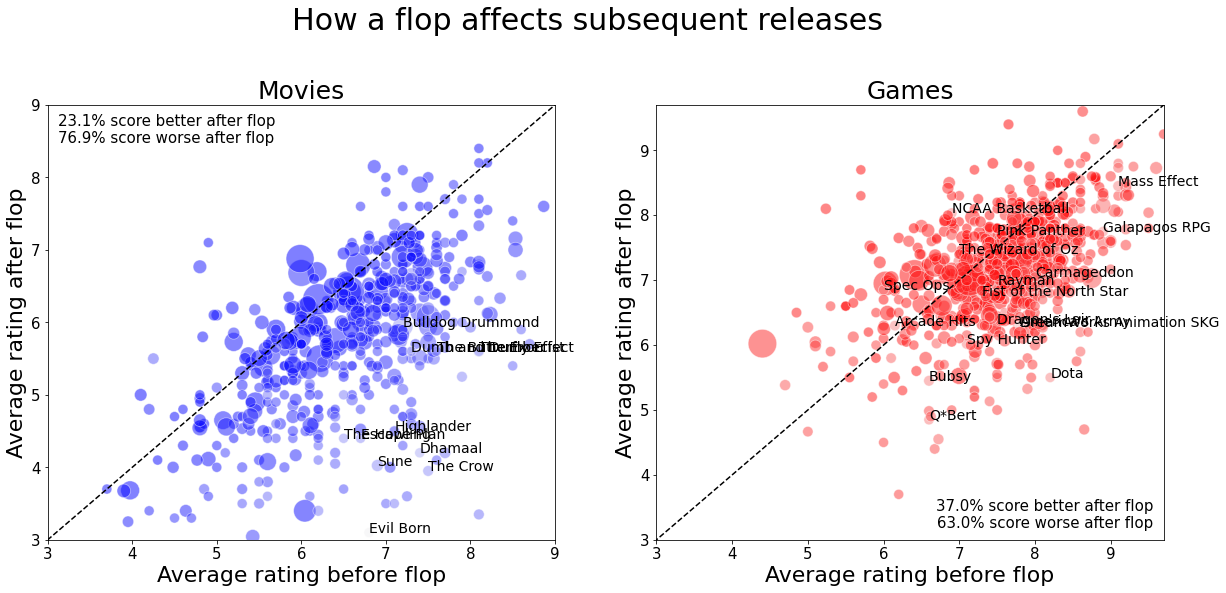

In [125]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 8)) # create a figure with 2 columns of subplots

# plot movie data as blue scatter plot
sns.scatterplot(ax=axs[0], x=franchise_grouped_df_movie_flops['avg_pre_rating_rolling_mean'], y=franchise_grouped_df_movie_flops['avg_post_rating_rolling_mean'], size=franchise_grouped_df_movie_flops['releases_in_franchise'], color='blue', alpha=0.5, hue=franchise_grouped_df_movie_flops['diff_from_rolling_mean'], palette=sns.light_palette("blue", as_cmap=True), sizes=(100, 1000))
game_scatter = sns.scatterplot(ax=axs[1], x=franchise_grouped_df_game_flops['avg_pre_rating_rolling_mean'], y=franchise_grouped_df_game_flops['avg_post_rating_rolling_mean'], size=franchise_grouped_df_game_flops['releases_in_franchise'], color='blue', alpha=0.5, hue=franchise_grouped_df_game_flops['diff_from_rolling_mean'], palette=sns.light_palette("red", as_cmap=True), sizes=(100, 1000))

for i, row in franchise_grouped_df_movie_flops.iterrows():
    # Prevents error messages for ones that don't appear on the graph
    if (row['lowest_rated_pos_rolling_mean'] < 100) & (row['lowest_rated_pos_rolling_mean'] > 0):
        if (row['diff_from_rolling_mean']) < -1.4:
            axs[0].text(row['avg_pre_rating_rolling_mean'], row['avg_post_rating_rolling_mean'], row['franchise_name'], fontsize=14)
for i, row in franchise_grouped_df_game_flops.iterrows():
    if (row['lowest_rated_pos_rolling_mean'] < 100) & (row['lowest_rated_pos_rolling_mean'] > 0):
          if (row['diff_from_rolling_mean']) < -1.4:
                axs[1].text(row['avg_pre_rating_rolling_mean'], row['avg_post_rating_rolling_mean'], row['franchise_name'], fontsize=14)


# set the same diagonal line from the origin for both subplots
max_val = max(df['avg_pre_rating_rolling_mean'].max(), df['avg_post_rating_rolling_mean'].max())
axs[0].plot([0, max_val], [0, max_val], 'k--')
axs[1].plot([0, max_val], [0, max_val], 'k--')

# set the x and y axis labels for both subplots
fig.suptitle('How a flop affects subsequent releases', fontsize = plot_title_size, y=1.05)
axs[0].set_title('Movies', fontsize = subplot_title_size)
axs[0].set_xlabel('Average rating before flop', fontsize = axis_label_size)
axs[0].set_ylabel('Average rating after flop', fontsize = axis_label_size)
axs[1].set_title('Games', fontsize = subplot_title_size)
axs[1].set_xlabel('Average rating before flop', fontsize = axis_label_size)
axs[1].set_ylabel('Average rating after flop', fontsize = axis_label_size)
axs[0].tick_params(labelsize=tick_label_size)
axs[1].tick_params(labelsize=tick_label_size)

axs[0].set_xlim([3, 9])
axs[0].set_ylim([3, 9])
axs[1].set_xlim([3, max_val])
axs[1].set_ylim([3, max_val])

# calculate the percentage of points above and below the line for each subplot
movie_above_line = 100 * len(franchise_grouped_df_movie_flops[franchise_grouped_df_movie_flops['avg_post_rating_rolling_mean'] > franchise_grouped_df_movie_flops['avg_pre_rating_rolling_mean']]) / len(franchise_grouped_df_movie_flops.dropna())
game_above_line = 100 * len(franchise_grouped_df_game_flops[franchise_grouped_df_game_flops['avg_post_rating_rolling_mean'] > franchise_grouped_df_game_flops['avg_pre_rating_rolling_mean']]) / len(franchise_grouped_df_game_flops.dropna())
movie_below_line = 100 - movie_above_line
game_below_line = 100 - game_above_line

# add the percentage of points above and below the line to each subplot
axs[0].text(0.02, 0.98, f'{movie_above_line:.1f}% score better after flop\n{movie_below_line:.1f}% score worse after flop', transform=axs[0].transAxes, va='top', ha='left', fontsize=15)
axs[1].text(0.98, 0.02, f'{game_above_line:.1f}% score better after flop\n{game_below_line:.1f}% score worse after flop', transform=axs[1].transAxes, va='bottom', ha='right', fontsize=15)


# Modify the legend
axs[0].legend().remove()
axs[1].legend().remove()

# show the plot
plt.show()


In [93]:
franchise_grouped_df_movie_flops = franchise_grouped_df_movie
franchise_grouped_df_game_flops = franchise_grouped_df_game

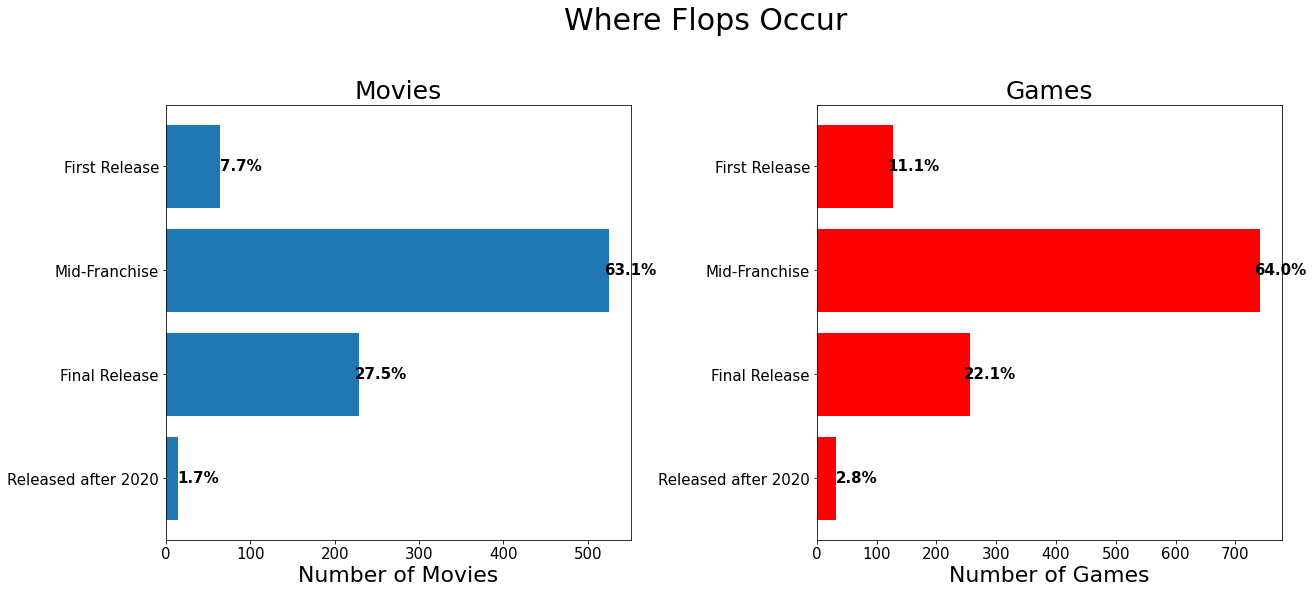

In [68]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 8)) # create a figure with 2 columns of subplots
fig.subplots_adjust(wspace=0.4, hspace=0.6)

# define the x-axis labels
x_labels = ['Released after 2020', 'Final Release', 'Mid-Franchise', 'First Release']

# create a list of the y-axis values
movie_values = [len(franchise_grouped_df_movie_flops[(franchise_grouped_df_movie_flops['lowest_rated_pos_rolling_mean'] == 100) & (franchise_grouped_df_movie_flops['lowest_rated_year_rolling_mean'] >= 2020)]),
            len(franchise_grouped_df_movie_flops[(franchise_grouped_df_movie_flops['lowest_rated_pos_rolling_mean'] == 100) & (franchise_grouped_df_movie_flops['lowest_rated_year_rolling_mean'] < 2020)]),
            len(franchise_grouped_df_movie_flops[~(franchise_grouped_df_movie_flops['lowest_rated_pos_rolling_mean'] == 0) & ~(franchise_grouped_df_movie_flops['lowest_rated_pos_rolling_mean'] == 100)]),
            len(franchise_grouped_df_movie_flops[franchise_grouped_df_movie_flops['lowest_rated_pos_rolling_mean'] == 0])]
            
game_values = [len(franchise_grouped_df_game_flops[(franchise_grouped_df_game_flops['lowest_rated_pos_rolling_mean'] == 100) & (franchise_grouped_df_game_flops['lowest_rated_year_rolling_mean'] >= 2020)]),
            len(franchise_grouped_df_game_flops[(franchise_grouped_df_game_flops['lowest_rated_pos_rolling_mean'] == 100) & (franchise_grouped_df_game_flops['lowest_rated_year_rolling_mean'] < 2020)]),
            len(franchise_grouped_df_game_flops[~(franchise_grouped_df_game_flops['lowest_rated_pos_rolling_mean'] == 0) & ~(franchise_grouped_df_game_flops['lowest_rated_pos_rolling_mean'] == 100)]),
            len(franchise_grouped_df_game_flops[franchise_grouped_df_game_flops['lowest_rated_pos_rolling_mean'] == 0])]
            
# plot the bar chart
axs[0].barh(x_labels, movie_values)
axs[1].barh(x_labels, game_values, color = 'red')

# set the title and y-axis label
fig.suptitle('Where  Occur', fontsize = plot_title_size, y = 1.05)
axs[0].set_title('Movies', fontsize = subplot_title_size)
axs[0].set_xlabel('Number of Movies', fontsize = axis_label_size)
axs[1].set_title('Games', fontsize = subplot_title_size)
axs[1].set_xlabel('Number of Games', fontsize = axis_label_size)
axs[0].tick_params(labelsize=tick_label_size)
axs[1].tick_params(labelsize=tick_label_size)

movie_percentages = [(x / sum(movie_values)) * 100 for x in movie_values]
game_percentages = [(x / sum(game_values)) * 100 for x in game_values]

for i, v in enumerate(movie_percentages):
    if v > 10:
        axs[0].text(movie_values[i]-5, i, str(round(v, 1)) + '%', color='black', fontweight='bold', fontsize=15, ha='left', va='center')
    else:
        axs[0].text(movie_values[i], i, str(round(v, 1)) + '%', color='black', fontweight='bold', fontsize=15, ha='left', va='center')

for i, v in enumerate(game_percentages):
    if v > 10:
        axs[1].text(game_values[i]-10, i, str(round(v, 1)) + '%', color='black', fontweight='bold', fontsize = 15, ha='left', va='center')
    else:
        axs[1].text(game_values[i], i, str(round(v, 1)) + '%', color='black', fontweight='bold', fontsize = 15, ha='left', va='center')  



# display the plot
plt.show()


This was out original idea with average vs lowest

In [84]:
franchise_grouped_df_movie_flops = franchise_grouped_df_movie[franchise_grouped_df_movie['diff_lowest_vs_avg'] > movie_percentile_90]
franchise_grouped_df_game_flops = franchise_grouped_df_game[franchise_grouped_df_game['diff_lowest_vs_avg'] > game_percentile_90]

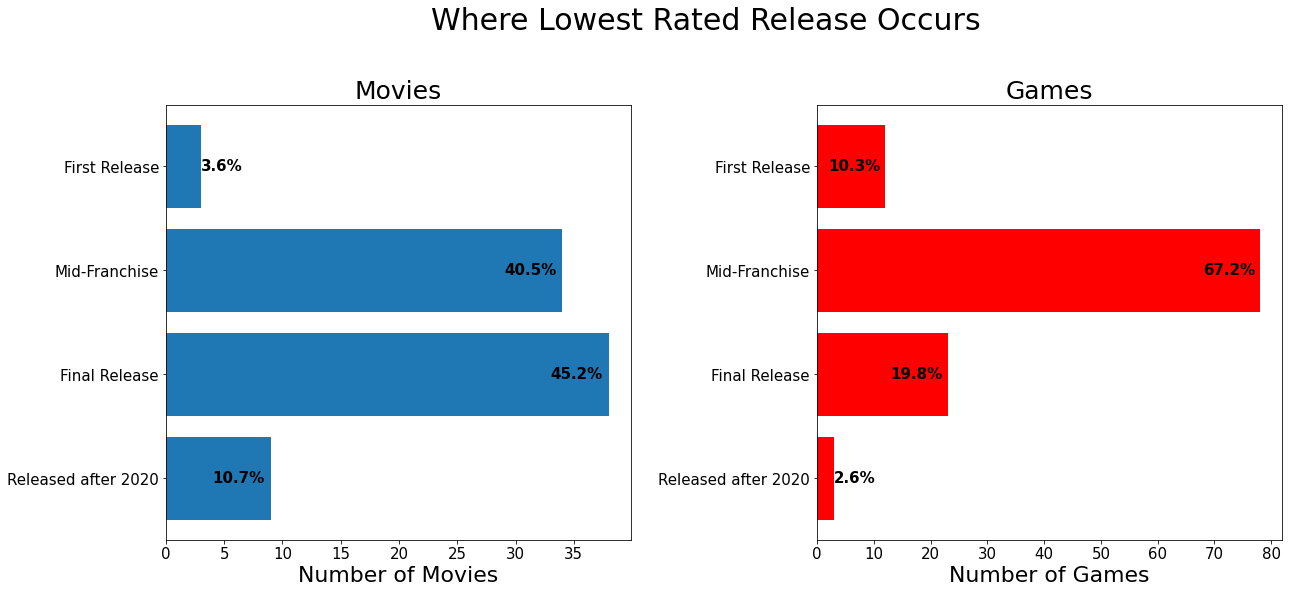

In [85]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 8)) # create a figure with 2 columns of subplots
fig.subplots_adjust(wspace=0.4, hspace=0.6)

# define the x-axis labels
x_labels = ['Released after 2020', 'Final Release', 'Mid-Franchise', 'First Release']

# create a list of the y-axis values
movie_values = [len(franchise_grouped_df_movie_flops[(franchise_grouped_df_movie_flops['pos_in_fran_lowest_rated'] == 100) & (franchise_grouped_df_movie_flops['lowest_rated_year'] >= 2020)]),
            len(franchise_grouped_df_movie_flops[(franchise_grouped_df_movie_flops['pos_in_fran_lowest_rated'] == 100) & (franchise_grouped_df_movie_flops['lowest_rated_year'] < 2020)]),
            len(franchise_grouped_df_movie_flops[~(franchise_grouped_df_movie_flops['pos_in_fran_lowest_rated'] == 0) & ~(franchise_grouped_df_movie_flops['pos_in_fran_lowest_rated'] == 100)]),
            len(franchise_grouped_df_movie_flops[franchise_grouped_df_movie_flops['pos_in_fran_lowest_rated'] == 0])]
            
game_values = [len(franchise_grouped_df_game_flops[(franchise_grouped_df_game_flops['pos_in_fran_lowest_rated'] == 100) & (franchise_grouped_df_game_flops['lowest_rated_year'] >= 2020)]),
            len(franchise_grouped_df_game_flops[(franchise_grouped_df_game_flops['pos_in_fran_lowest_rated'] == 100) & (franchise_grouped_df_game_flops['lowest_rated_year'] < 2020)]),
            len(franchise_grouped_df_game_flops[~(franchise_grouped_df_game_flops['pos_in_fran_lowest_rated'] == 0) & ~(franchise_grouped_df_game_flops['pos_in_fran_lowest_rated'] == 100)]),
            len(franchise_grouped_df_game_flops[franchise_grouped_df_game_flops['pos_in_fran_lowest_rated'] == 0])]
            
# plot the bar chart
axs[0].barh(x_labels, movie_values)
axs[1].barh(x_labels, game_values, color = 'red')

# set the title and y-axis label
fig.suptitle('Where Lowest Rated Release Occurs', fontsize = plot_title_size, y = 1.05)
axs[0].set_title('Movies', fontsize = subplot_title_size)
axs[0].set_xlabel('Number of Movies', fontsize = axis_label_size)
axs[1].set_title('Games', fontsize = subplot_title_size)
axs[1].set_xlabel('Number of Games', fontsize = axis_label_size)
axs[0].tick_params(labelsize=tick_label_size)
axs[1].tick_params(labelsize=tick_label_size)

movie_percentages = [(x / sum(movie_values)) * 100 for x in movie_values]
game_percentages = [(x / sum(game_values)) * 100 for x in game_values]

for i, v in enumerate(movie_percentages):
    if v > 10:
        axs[0].text(movie_values[i]-5, i, str(round(v, 1)) + '%', color='black', fontweight='bold', fontsize=15, ha='left', va='center')
    else:
        axs[0].text(movie_values[i], i, str(round(v, 1)) + '%', color='black', fontweight='bold', fontsize=15, ha='left', va='center')

for i, v in enumerate(game_percentages):
    if v > 10:
        axs[1].text(game_values[i]-10, i, str(round(v, 1)) + '%', color='black', fontweight='bold', fontsize = 15, ha='left', va='center')
    else:
        axs[1].text(game_values[i], i, str(round(v, 1)) + '%', color='black', fontweight='bold', fontsize = 15, ha='left', va='center')  



# display the plot
plt.show()


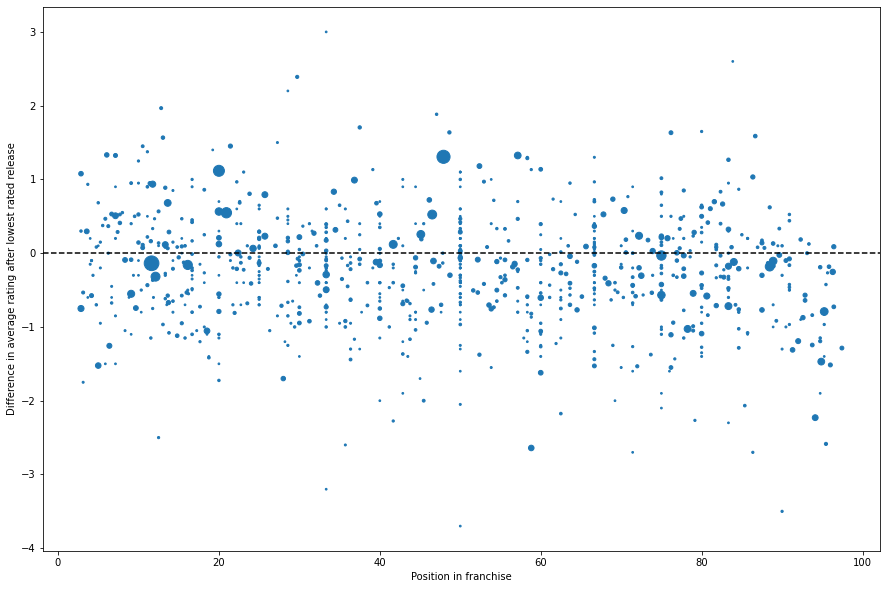

In [33]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.scatter(y=franchise_grouped_df['diff_pre_vs_post'], x=franchise_grouped_df['pos_in_fran_lowest_rated'], s = franchise_grouped_df['releases_in_franchise'])
plt.axhline(y=0, linestyle='--', color='black')
plt.ylabel('Difference in average rating after lowest rated release')
plt.xlabel('Position in franchise')
#plt.xscale('log')
plt.show()


In [34]:
franchise_grouped_df[franchise_grouped_df['content_type']=='game'].diff_lowest_vs_avg.describe()

count    1157.000000
mean        1.094568
std         0.832433
min         0.000000
25%         0.500000
50%         0.882576
75%         1.466667
max         6.306140
Name: diff_lowest_vs_avg, dtype: float64

In [35]:
franchise_grouped_df_movie[franchise_grouped_df_movie['avg_pre_rating'] == franchise_grouped_df_movie['avg_post_rating']]

,franchise_name,total_running_length_years,releases_in_franchise,content_type,avg_pre_rating,average_rating,lowest_rating,avg_post_rating,average_votes,lowest_rated_year,pos_in_fran_lowest_rated,diff_between_post_and_lowest,diff_between_pre_and_lowest,diff_pre_vs_post,diff_lowest_vs_avg
franchise_id,,,,,,,,,,,,,,,
f1050,Lucky Stars (Secondary Trilogy),7.0,3.0,movie,5.4,5.366667,5.30,5.4,227.666667,1989.0,50.000000,0.10,0.10,0.0,0.066667
f1092,My Wife Is a Gangster,6.0,3.0,movie,6.3,6.200000,6.00,6.3,2138.666667,2003.0,40.000000,0.30,0.30,0.0,0.200000
f1108,Noriko,5.0,3.0,movie,8.2,8.166667,8.10,8.2,30134.000000,1951.0,50.000000,0.10,0.10,0.0,0.066667
f1272,"Wally ""The Fox"" Benton",3.0,3.0,movie,6.7,6.633333,6.50,6.7,794.000000,1942.0,50.000000,0.20,0.20,0.0,0.133333
f776,BRD Trilogy,4.0,4.0,movie,7.7,7.450000,6.95,7.7,8320.666667,1981.0,66.666667,0.75,0.75,0.0,0.500000
f960,The Happy Hooker,6.0,3.0,movie,3.7,3.600000,3.40,3.7,857.666667,1977.0,40.000000,0.30,0.30,0.0,0.200000


In [36]:
franchise_grouped_df_game_flops[(franchise_grouped_df_game_flops['pos_in_fran_lowest_rated'] == 100) & (franchise_grouped_df_game_flops['lowest_rated_year'] > 2019)]

,franchise_name,total_running_length_years,releases_in_franchise,content_type,avg_pre_rating,average_rating,lowest_rating,avg_post_rating,average_votes,lowest_rated_year,pos_in_fran_lowest_rated,diff_between_post_and_lowest,diff_between_pre_and_lowest,diff_pre_vs_post,diff_lowest_vs_avg
franchise_id,,,,,,,,,,,,,,,
3025-148,Diablo,27.0,8.0,game,8.285714,7.612500,2.9,NaN,1929.375,2022.0,100.0,NaN,5.385714,NaN,4.712500
3025-51,Battlefield,20.0,18.0,game,7.476923,7.171429,3.2,NaN,2729.750,2021.0,100.0,NaN,4.276923,NaN,3.971429
3025-848,The Fast and The Furious,15.0,5.0,game,6.450000,5.412500,2.3,NaN,167.250,2020.0,100.0,NaN,4.150000,NaN,3.112500


In [37]:
len(franchise_grouped_df_movie[franchise_grouped_df_movie['avg_pre_rating'] < franchise_grouped_df_movie['avg_post_rating']]) / len(franchise_grouped_df_movie.dropna())

0.2839506172839506

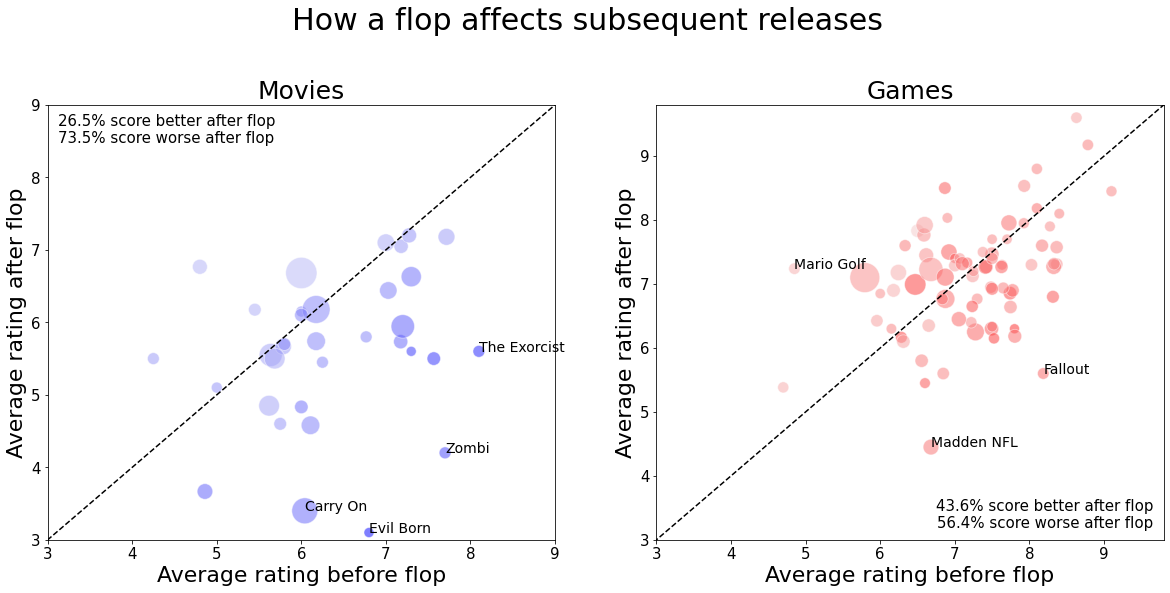

In [129]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 8)) # create a figure with 2 columns of subplots

# plot movie data as blue scatter plot
sns.scatterplot(ax=axs[0], x=franchise_grouped_df_movie_flops['avg_pre_rating'], y=franchise_grouped_df_movie_flops['avg_post_rating'], size=franchise_grouped_df_movie_flops['releases_in_franchise'], color='blue', alpha=0.5, hue=franchise_grouped_df_movie_flops['diff_between_pre_and_lowest'], palette=sns.light_palette("blue", as_cmap=True), sizes=(100, 1000))
game_scatter = sns.scatterplot(ax=axs[1], x=franchise_grouped_df_game_flops['avg_pre_rating'], y=franchise_grouped_df_game_flops['avg_post_rating'], size=franchise_grouped_df_game_flops['releases_in_franchise'], color='blue', alpha=0.5, hue=franchise_grouped_df_game_flops['diff_between_pre_and_lowest'], palette=sns.light_palette("red", as_cmap=True), sizes=(100, 1000))

for i, row in franchise_grouped_df_movie_flops.iterrows():
    # Prevents error messages for ones that don't appear on the graph
    if (row['pos_in_fran_lowest_rated'] < 100) & (row['pos_in_fran_lowest_rated'] > 0):
        if abs(row['diff_pre_vs_post']) > 2.2:
            axs[0].text(row['avg_pre_rating'], row['avg_post_rating'], row['franchise_name'], fontsize=14)
for i, row in franchise_grouped_df_game_flops.iterrows():
    if (row['pos_in_fran_lowest_rated'] < 100) & (row['pos_in_fran_lowest_rated'] > 0):
          if abs(row['diff_pre_vs_post']) > 2.2:
                axs[1].text(row['avg_pre_rating'], row['avg_post_rating'], row['franchise_name'], fontsize=14)


# set the same diagonal line from the origin for both subplots
max_val = max(df['avg_pre_rating'].max(), df['avg_post_rating'].max())
axs[0].plot([0, max_val], [0, max_val], 'k--')
axs[1].plot([0, max_val], [0, max_val], 'k--')

# set the x and y axis labels for both subplots
fig.suptitle('How a flop affects subsequent releases', fontsize = plot_title_size, y=1.05)
axs[0].set_title('Movies', fontsize = subplot_title_size)
axs[0].set_xlabel('Average rating before flop', fontsize = axis_label_size)
axs[0].set_ylabel('Average rating after flop', fontsize = axis_label_size)
axs[1].set_title('Games', fontsize = subplot_title_size)
axs[1].set_xlabel('Average rating before flop', fontsize = axis_label_size)
axs[1].set_ylabel('Average rating after flop', fontsize = axis_label_size)
axs[0].tick_params(labelsize=tick_label_size)
axs[1].tick_params(labelsize=tick_label_size)

axs[0].set_xlim([3, 9])
axs[0].set_ylim([3, 9])
axs[1].set_xlim([3, max_val])
axs[1].set_ylim([3, max_val])

# calculate the percentage of points above and below the line for each subplot
movie_above_line = 100 * len(franchise_grouped_df_movie_flops[franchise_grouped_df_movie_flops['avg_post_rating'] > franchise_grouped_df_movie_flops['avg_pre_rating']]) / len(franchise_grouped_df_movie_flops.dropna())
game_above_line = 100 * len(franchise_grouped_df_game_flops[franchise_grouped_df_game_flops['avg_post_rating'] > franchise_grouped_df_game_flops['avg_pre_rating']]) / len(franchise_grouped_df_game_flops.dropna())
movie_below_line = 100 - movie_above_line
game_below_line = 100 - game_above_line

# add the percentage of points above and below the line to each subplot
axs[0].text(0.02, 0.98, f'{movie_above_line:.1f}% score better after flop\n{movie_below_line:.1f}% score worse after flop', transform=axs[0].transAxes, va='top', ha='left', fontsize=15)
axs[1].text(0.98, 0.02, f'{game_above_line:.1f}% score better after flop\n{game_below_line:.1f}% score worse after flop', transform=axs[1].transAxes, va='bottom', ha='right', fontsize=15)


# Modify the legend
axs[0].legend().remove()
axs[1].legend().remove()

# show the plot
plt.show()


In [64]:
franchise_grouped_df_movie_flops.count()

franchise_name                  84
total_running_length_years      84
releases_in_franchise           84
content_type                    84
avg_pre_rating                  81
average_rating                  84
lowest_rating                   84
avg_post_rating                 37
average_votes                   84
lowest_rated_year               84
pos_in_fran_lowest_rated        84
diff_between_post_and_lowest    37
diff_between_pre_and_lowest     84
diff_pre_vs_post                34
diff_lowest_vs_avg              84
dtype: int64

In [65]:
franchise_grouped_df_game_flops.count()

franchise_name                  116
total_running_length_years      116
releases_in_franchise           116
content_type                    116
avg_pre_rating                  104
average_rating                  116
lowest_rating                   116
avg_post_rating                  90
average_votes                   116
lowest_rated_year               116
pos_in_fran_lowest_rated        116
diff_between_post_and_lowest     90
diff_between_pre_and_lowest     116
diff_pre_vs_post                 78
diff_lowest_vs_avg              116
dtype: int64

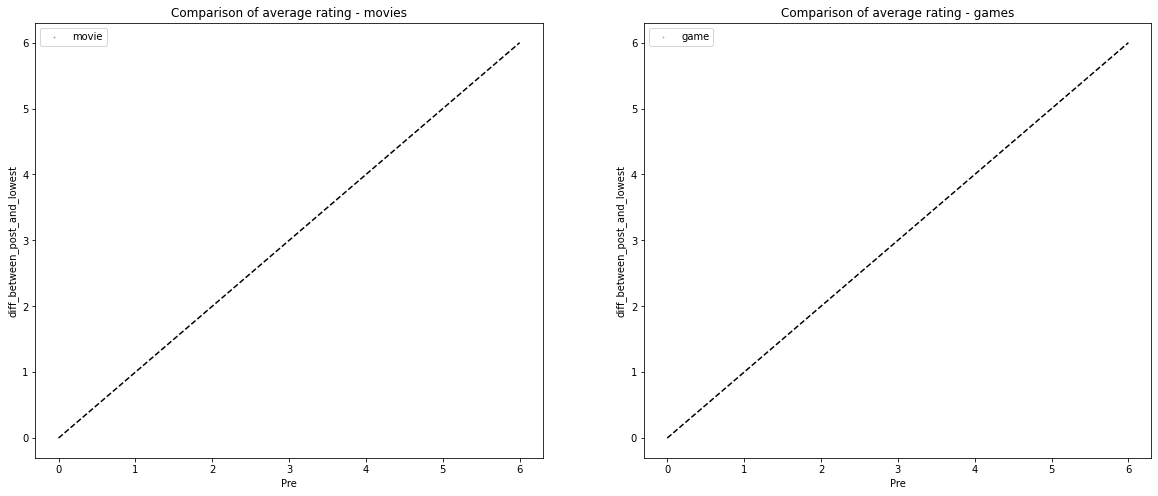

In [41]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 8)) # create a figure with 2 columns of subplots

# create separate dataframes for movie and game content types
franchise_grouped_df_movie = franchise_grouped_df[(franchise_grouped_df['content_type'] == 'movie') & (franchise_grouped_df['diff_between_pre_and_lowest'] < -2)]
franchise_grouped_df_game = franchise_grouped_df[(franchise_grouped_df['content_type'] == 'game')  & (franchise_grouped_df['diff_between_pre_and_lowest'] < -2)]

# plot movie data as blue scatter plot
axs[0].scatter(x=-franchise_grouped_df_movie['diff_between_pre_and_lowest'], y=franchise_grouped_df_movie['diff_between_post_and_lowest'], s=franchise_grouped_df_movie['releases_in_franchise']*2, color='blue', label='movie', alpha=0.3)
# plot game data as red scatter plot
axs[1].scatter(x=-franchise_grouped_df_game['diff_between_pre_and_lowest'], y=franchise_grouped_df_game['diff_between_post_and_lowest'], s=franchise_grouped_df_game['releases_in_franchise']*2, color='red', label='game', alpha=0.3)

# set the same diagonal line from the origin for both subplots
max_val = max(df['diff_between_pre_and_lowest'].max(), df['diff_between_post_and_lowest'].max())
axs[0].plot([0, max_val], [0, max_val], 'k--')
axs[1].plot([0, max_val], [0, max_val], 'k--')

# set the x and y axis labels for both subplots
axs[0].set_title('Comparison of average rating - movies')
axs[0].set_xlabel('Pre')
axs[0].set_ylabel('diff_between_post_and_lowest')
axs[1].set_title('Comparison of average rating - games')
axs[1].set_xlabel('Pre')
axs[1].set_ylabel('diff_between_post_and_lowest')

# set legend for both subplots
axs[0].legend()
axs[1].legend()

# show the plot
plt.show()


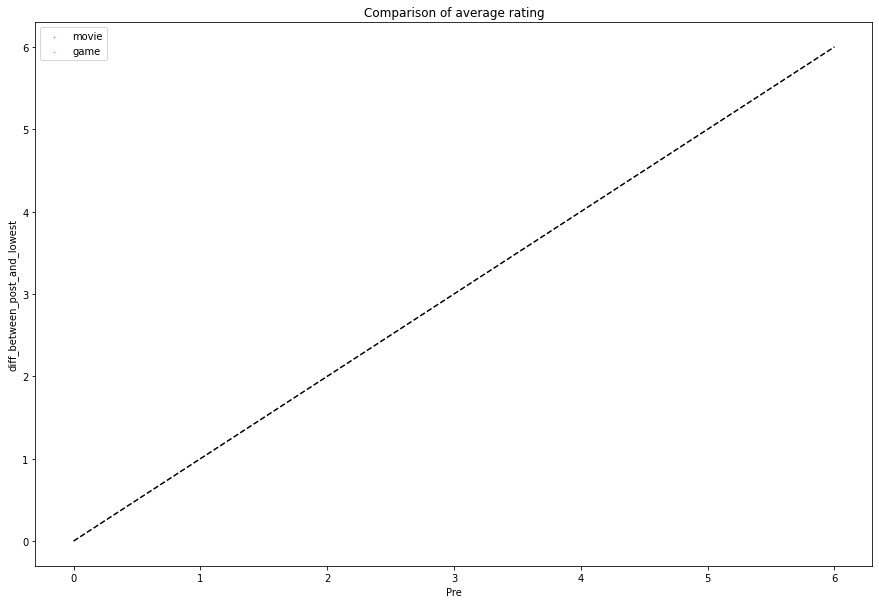

In [42]:
fig, ax = plt.subplots(figsize=(15, 10))

# plot movie data as blue scatter plot
plt.scatter(x = -franchise_grouped_df_movie['diff_between_pre_and_lowest'], y = franchise_grouped_df_movie['diff_between_post_and_lowest'], s=franchise_grouped_df_movie['releases_in_franchise']*2, color='blue', label='movie', alpha = 0.3,)

# plot game data as red scatter plot
plt.scatter(-franchise_grouped_df_game['diff_between_pre_and_lowest'], franchise_grouped_df_game['diff_between_post_and_lowest'], s=franchise_grouped_df_game['releases_in_franchise']*2, color='red', label='game', alpha = 0.3)

#plt.scatter(-franchise_grouped_df[franchise_grouped_df["franchise_name"] == 'Marvel']['diff_between_pre_and_lowest'], franchise_grouped_df[franchise_grouped_df["franchise_name"] == 'Marvel']['diff_between_post_and_lowest'], s=franchise_grouped_df['releases_in_franchise'], color='green')
# draw a diagonal line from the origin
max_val = max(df['diff_between_pre_and_lowest'].max(), df['diff_between_post_and_lowest'].max())
plt.plot([0, max_val], [0, max_val], 'k--')

# set the x and y axis labels
plt.title('Comparison of average rating')
plt.xlabel('Pre',)
plt.ylabel('diff_between_post_and_lowest')

# set legend
plt.legend()

# show the plot
plt.show()


In [43]:
franchise_grouped_df['average_year_gap_between_releases'] = franchise_grouped_df['total_running_length_years'] / franchise_grouped_df['releases_in_franchise']

<AxesSubplot:>

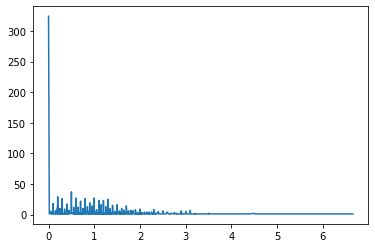

In [44]:
franchise_grouped_df.diff_between_pre_and_lowest.value_counts().sort_index().plot()

In [45]:
bins = pd.qcut(franchise_grouped_df_game.diff_lowest_vs_avg, 10)

# Get the counts of values in each bin
counts = bins.value_counts().sort_index()

# Plot a histogram of the bin counts
counts.plot(kind='bar')
plt.xlabel('Bins')
plt.ylabel('Count')
plt.title('Distribution of diff_between_pre_and_lowest')
plt.show()

ValueError: Bin edges must be unique: array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [ ]:
bins.value_counts().sort_index()

The reason we are doing this is because we don't want to assume that a franchise that just gradually decreased in rating died as a result of their last release being a flop. This is why we are taking into account only those franchises where there was a significant drop below the average

In [ ]:
franchise_grouped_df[(franchise_grouped_df['diff_between_pre_and_lowest']>-0.5)].content_type.value_counts()

In [ ]:
franchise_grouped_df[(franchise_grouped_df['diff_between_pre_and_lowest'] < -2) & (franchise_grouped_df['pos_in_fran_lowest_rated'] != 100)]

In [ ]:
df

In [ ]:
movies = df[df['type'] == 'movie']
games = df[df['type'] == 'game']


In [ ]:
movies['pos_tens'] = pd.qcut(movies['position_in_franchise'].rank(method='first'), q=10,)
games['pos_tens'] = pd.qcut(games['position_in_franchise'].rank(method='first'), q=10,)
df['pos_tens'] = pd.qcut(df['position_in_franchise'].rank(method='first'), q=10,)

df.groupby('pos_tens')['votes_average'].mean().plot()


In [ ]:
#franchise_grouped_df.groupby((franchise_grouped_df['average_releases_per_year'] // 0.1) * 0.1)['average_rating'].mean().plot()
#df[df["min_rating"] == df["rating_average"]].position_in_franchise.value_counts() // 0.1 * 0.1.sort_index().plot(color="blue", alpha =0.7, ax=ax, label = "Lowest rated release")

fig, ax = plt.subplots(figsize=(15, 10))
df[df["min_vote"] == df["votes_average"]].position_in_franchise.value_counts().sort_index().plot(xlabel="Position in franchise", ylabel="Number of franchises", color="red", ax=ax, label = "Lowest amount of votes")
df[df["min_rating"] == df["rating_average"]].position_in_franchise.value_counts().sort_index().plot(color="blue", alpha =0.7, ax=ax, label = "Lowest rated release")
df[df["max_vote"] == df["votes_average"]].position_in_franchise.value_counts().sort_index().plot(xlabel="Position in franchise", ylabel="Number of franchises", color="red", ax=ax, label = "Highest amount of votes", linestyle = ':')
df[df["max_rating"] == df["rating_average"]].position_in_franchise.value_counts().sort_index().plot(color="blue", alpha =0.7, ax=ax, label = "Highest rated release", linestyle = '--')

plt.legend()
plt.show()

In [ ]:
games_df = df[df["type"] == "game"]
movies_df = df[df["type"] == "movie"]

In [ ]:
movies_df

- Define a flop
- Normalise rating diff to see what the biggest drop offs are across both media
- Graph results and use it to define a reasonable threshold for a flop
- stacked bar chart for games and movies showing % of flops that "recovered"\
&nbsp; ie if the content that flopped was the last in the series\
&nbsp; (may need to filter out content that was released in the last year or 2)


In [ ]:
games_df.loc[games_df.franchise_name.isin(movies_df.franchise_name),'match']=True

In [ ]:
games_df[pd.notnull(games_df["match"])]["franchise_name"].unique()

As discussed on Friday it will be interesting to see how you define a "flop" and explore the recovery or otherwise after a flop. try to keep it simple reasonable. If you decide, for example, that a flop is a movie/game that has x% fewer ratings/votes that the preceding title then that's fine as long as you can defend x. You can also write you analysis code in such a way as to make it easy to change x so that you can do a "sensitivity analysis" by varying x. If you find that the outcome is similar for various ranges of x then that's a good sign.
